In [51]:
#!/usr/bin/env python
# Written by Jason Huang
# This report aims to answer questions on GPU that is usually installed on computers.

# Cleaning data results in the following modification to dataset.
# GCN 1.1 Grenada XT (line 954)

# Create as many graphs as you can (scatter plots, bar graphs, pie chart, boxplot, line plot, histogram, etc.)
# Filter your data to different categories (as memory type, manufacturer, etc.) and graph them.
# Observe the correlations between data by using scatter plot
# How to apply t-test to answer the hypothesis
# After finish drawing graphs you can fill out the analysis (you should analyze every graph)

# Import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Create functions here to use.
def replace(column):
    df[column] = df[column].str.replace(' ', '')
    df[column] = df[column].str.replace('\n', '')
    df[column] = df[column].str.replace('$', '')
    df[column] = df[column].str.replace('-', '0')
    df[column] = df[column].str.replace('GB/sec', '')
    df[column] = df[column].str.replace('1000MB/sec', '1')
    df[column] = df[column].str.replace('880MB/sec', '0.88')
    df[column] = df[column].str.replace('800MB/sec', '0.8')
    df[column] = df[column].str.replace('MB', '')
    df[column] = df[column].str.replace('Bit', '')
    df[column] = df[column].str.replace('MHz', '')
    df[column] = df[column].str.replace('Watts', '')
    df[column] = df[column].fillna(0)
    df[column] = df[column].apply(pd.to_numeric)
    
def date_replace(column):
    df[column] = df[column].str.replace(' ', '')
    df[column] = df[column].str.replace('\n', '')
    df[column] = df[column].str.replace('\t', '')
    df[column] = df[column].str.replace('UnknownReleaseDate', '0')
    df[column] = df[column].str.replace('Jan', '01')
    df[column] = df[column].str.replace('Feb', '02')
    df[column] = df[column].str.replace('Mar', '03')
    df[column] = df[column].str.replace('Apr', '04')
    df[column] = df[column].str.replace('May', '05')
    df[column] = df[column].str.replace('Jun', '06')
    df[column] = df[column].str.replace('Jul', '07')
    df[column] = df[column].str.replace('Aug', '08')
    df[column] = df[column].str.replace('Sep', '09')
    df[column] = df[column].str.replace('Oct', '10')
    df[column] = df[column].str.replace('Nov', '11')
    df[column] = df[column].str.replace('Dec', '12')
    df[column] = df[column].fillna(0)
    
def t_test(sample1, sample2):
    # Calculate the T-test
    # Compute the difference between the two sample means.
    diff = sample2.mean() - sample1.mean()
    print('The difference between two sample mean is {}.'.format(diff))
    # Create the arrays to calculate the standard error of difference.
    size = np.array([len(sample1), len(sample2)])
    sd = np.array([sample1.std(), sample2.std()])
    print('The arrary for size is {}.'.format(size))
    print('The array for standard deviation is {}.'.format(sd))
    # Standard Error equation is squared standard deviations 
    # divided by sample size, summed, then square rooted.
    diff_se = (sum((sd ** 2) / size)) ** 0.5
    print('The standard error of this dataset is {}.'.format(diff_se))
    # T-Value is difference between means divided by Standard Error
    print('The T-value of this dataset is {}.'.format(diff / diff_se))
    
# Create a dataframe and import the dataset.
df = pd.read_csv('All_GPUs.csv')

# Remove name tags and replace NaN with 0.
replace('Release_Price')
replace('Memory')
replace('Memory_Bandwidth')
replace('Memory_Bus')
replace('Core_Speed')
replace('Memory_Speed')
replace('Max_Power')
date_replace('Release_Date')

#Testing room
#print(df['Release_Price'][170:190])
#print(df['Memory'])
#print(df['Core_Speed'])
#print(df['Max_Power'])
#print(df['Memory_Speed'])
#print(df['Release_Date'][130:170])
#df

Question 1: How do the GPU processing power affect the price?
We will first compare GPU memory size to released price.


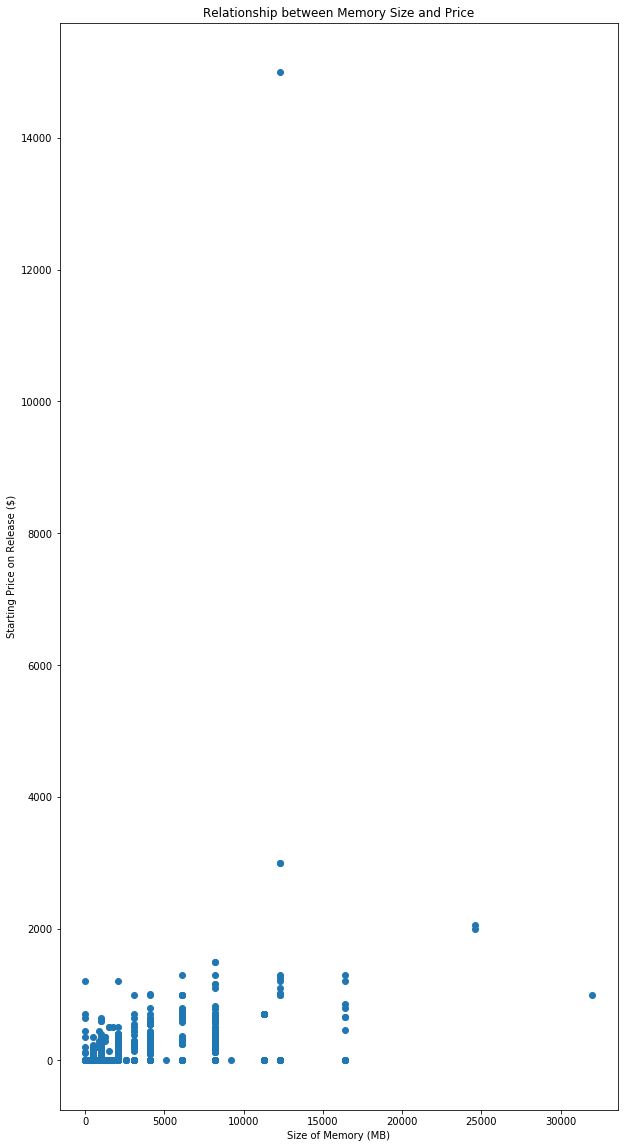

In [52]:
print('Question 1: How do the GPU processing power affect the price?')
print('We will first compare GPU memory size to released price.')

plt.figure(figsize=(10, 20))
plt.scatter(x=df['Memory'], y=df['Release_Price'])
plt.ylabel('Starting Price on Release ($)')
plt.xlabel('Size of Memory (MB)')
plt.title('Relationship between Memory Size and Price')
plt.show()

However, the scatterplot is hard to see clearly due to the one outlier that is sitting outside.
Also, is there really a GPU out there that cost $14999.00 while some are $1499.00?
This must be a typo in the dataset, so remove it. Also remove the zeros
The modified plot shows that as GPU memory size increase, less GPU are made and prices generally jump higher.


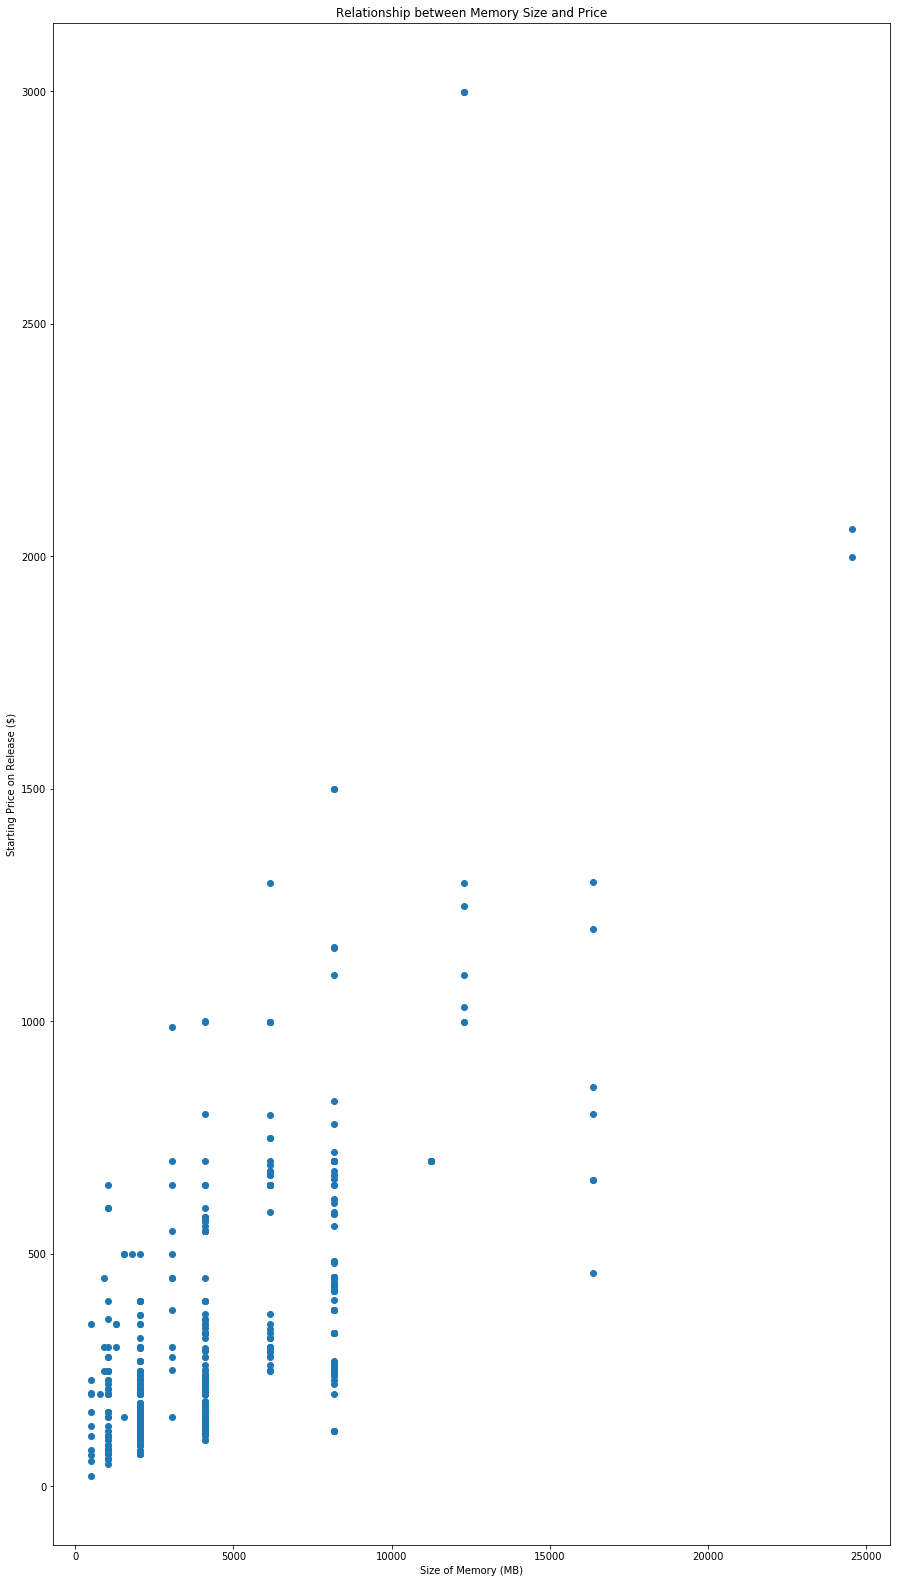

The difference between two sample mean is -4256.082016985139.
The arrary for size is [471 471].
The array for standard deviation is [ 3404.09114029   328.76365091].
The standard error of this dataset is 157.5820618592979.
The T-value of this dataset is -27.008670700002103.


In [53]:
print('However, the scatterplot is hard to see clearly due to the one outlier that is sitting outside.')
print('Also, is there really a GPU out there that cost $14999.00 while some are $1499.00?')
print('This must be a typo in the dataset, so remove it. Also remove the zeros')
print('The modified plot shows that as GPU memory size increase, less GPU are made and prices generally jump higher.')

# Modified dataframe to remove extreme outlier and any zero.
df = df[df.Memory != 0]
df = df[df.Core_Speed != 0]
df = df[df.Release_Price != 0]
df = df[df.Release_Price != 14999]

# Plot new dataframe
plt.figure(figsize=(15, 28))
plt.scatter(x=df['Memory'], y=df['Release_Price'])
plt.ylabel('Starting Price on Release ($)')
plt.xlabel('Size of Memory (MB)')
plt.title('Relationship between Memory Size and Price')
plt.show()

# Perform the T-Test
t_test(df['Memory'], df['Release_Price'])

How will this be applied if it is Memory Bandwidth?


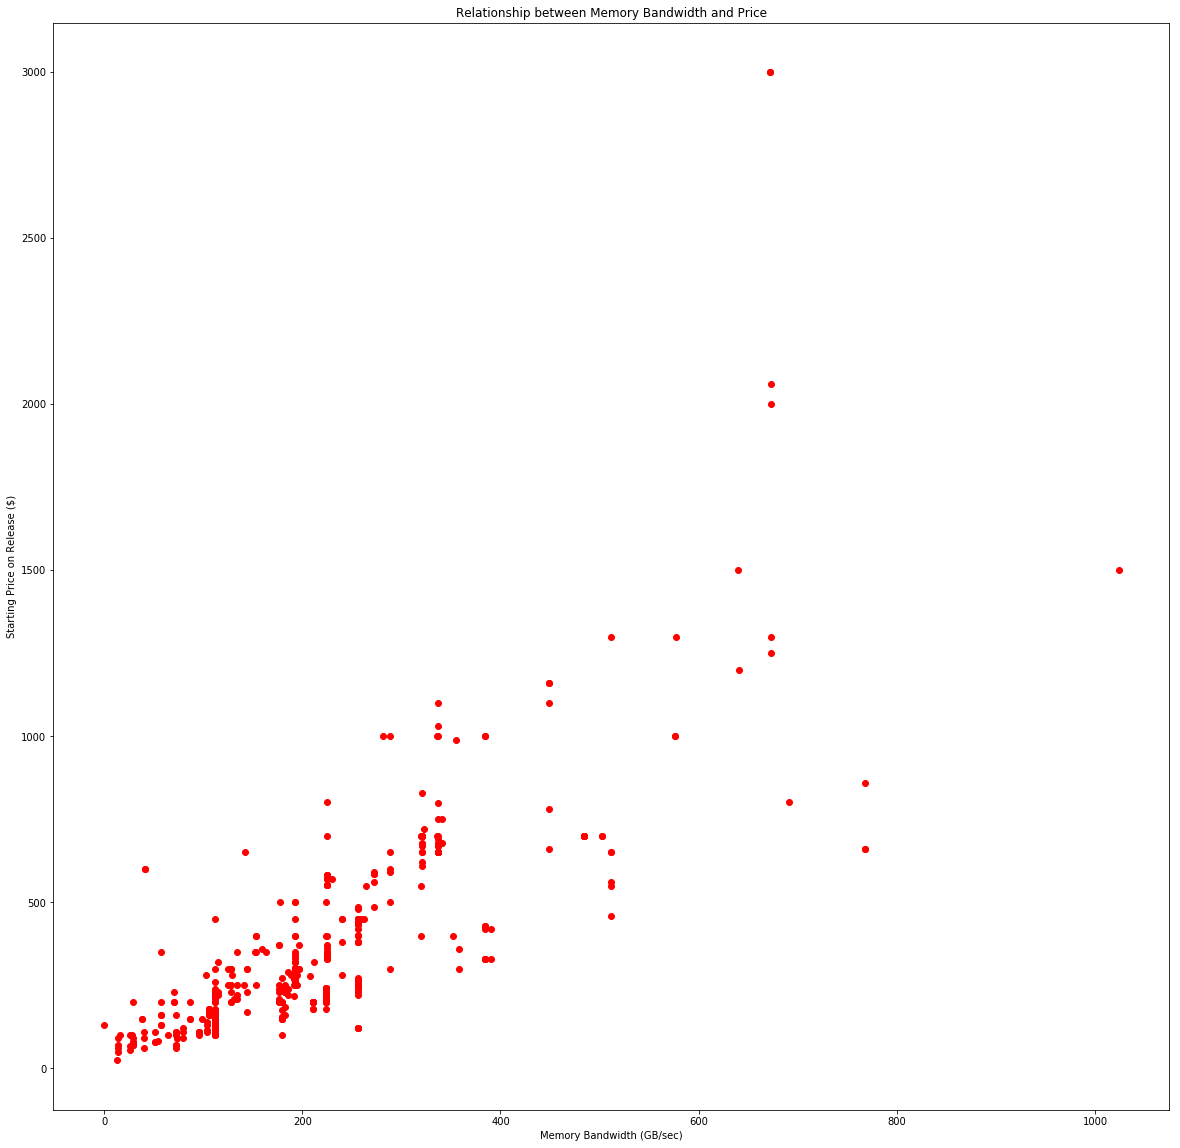

The difference between two sample mean is 142.19441613588057.
The arrary for size is [471 471].
The array for standard deviation is [ 139.8697766   328.76365091].
The standard error of this dataset is 16.462599481088116.
The T-value of this dataset is 8.637421829962546.


In [54]:
print('How will this be applied if it is Memory Bandwidth?')

# Plot new dataframe
plt.figure(figsize=(20, 20))
plt.scatter(x=df['Memory_Bandwidth'], y=df['Release_Price'], color='red')
plt.ylabel('Starting Price on Release ($)')
plt.xlabel('Memory Bandwidth (GB/sec)')
plt.title('Relationship between Memory Bandwidth and Price')
plt.show()
# Perform the T-Test
t_test(df['Memory_Bandwidth'], df['Release_Price'])

How will this be applied if it is Memory Bus?


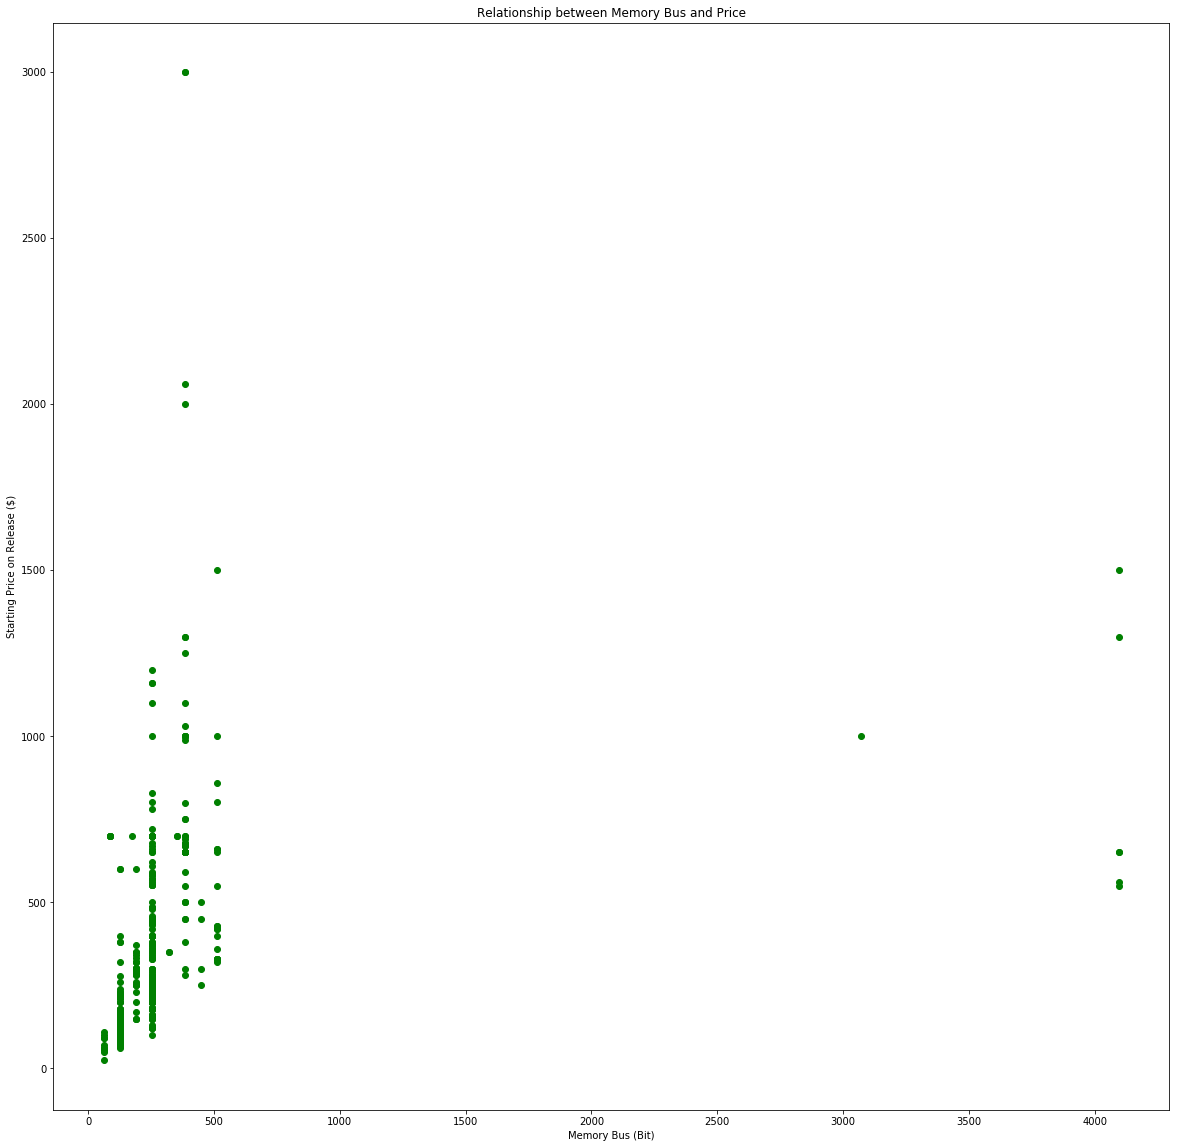

The difference between two sample mean is 67.16214437367262.
The arrary for size is [471 471].
The array for standard deviation is [ 463.71121201  328.76365091].
The standard error of this dataset is 26.191910807140008.
The T-value of this dataset is 2.56423232608764.


In [55]:
print('How will this be applied if it is Memory Bus?')
# Plot new dataframe
plt.figure(figsize=(20, 20))
plt.scatter(x=df['Memory_Bus'], y=df['Release_Price'], color='green')
plt.ylabel('Starting Price on Release ($)')
plt.xlabel('Memory Bus (Bit)')
plt.title('Relationship between Memory Bus and Price')
plt.show()
# Perform the T-Test
t_test(df['Memory_Bus'], df['Release_Price'])

How will this be applied if it is GPU Processor Clock Speed?
Quite unlike all memory resources, the chart varies widely.


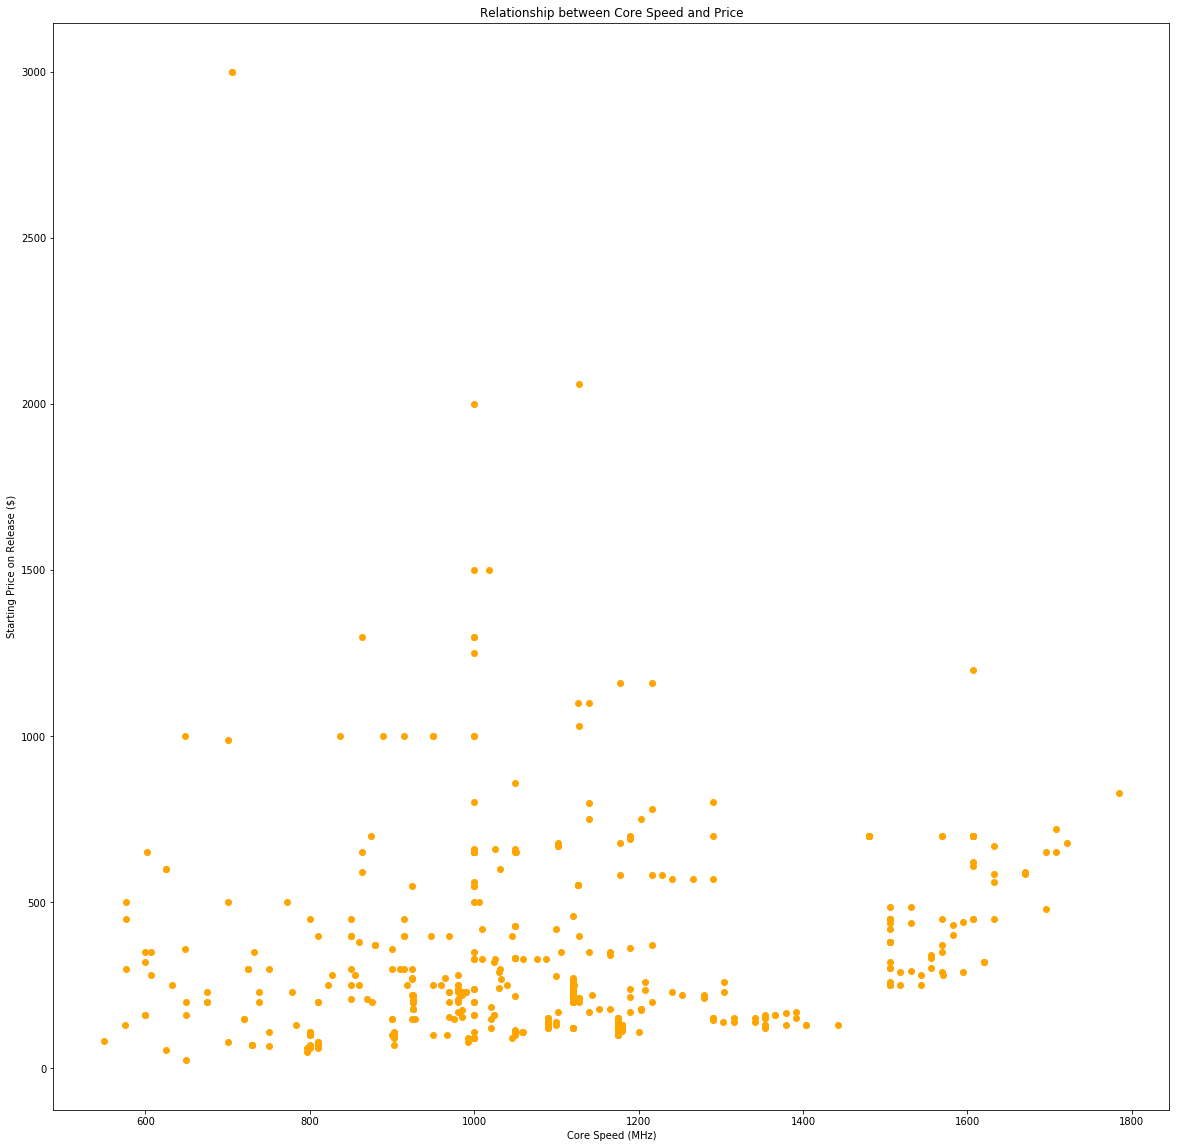

The difference between two sample mean is -748.428089171975.
The arrary for size is [471 471].
The array for standard deviation is [ 259.36617095  328.76365091].
The standard error of this dataset is 19.295244829439664.
The T-value of this dataset is -38.78821418373832.


In [56]:
print('How will this be applied if it is GPU Processor Clock Speed?')
print('Quite unlike all memory resources, the chart varies widely.')
plt.figure(figsize=(20, 20))
plt.scatter(x=df['Core_Speed'], y=df['Release_Price'], color='orange')
plt.ylabel('Starting Price on Release ($)')
plt.xlabel('Core Speed (MHz)')
plt.title('Relationship between Core Speed and Price')
plt.show()
# Perform the T-Test
t_test(df['Core_Speed'], df['Release_Price'])

How will this be applied if we combine all memories and price?


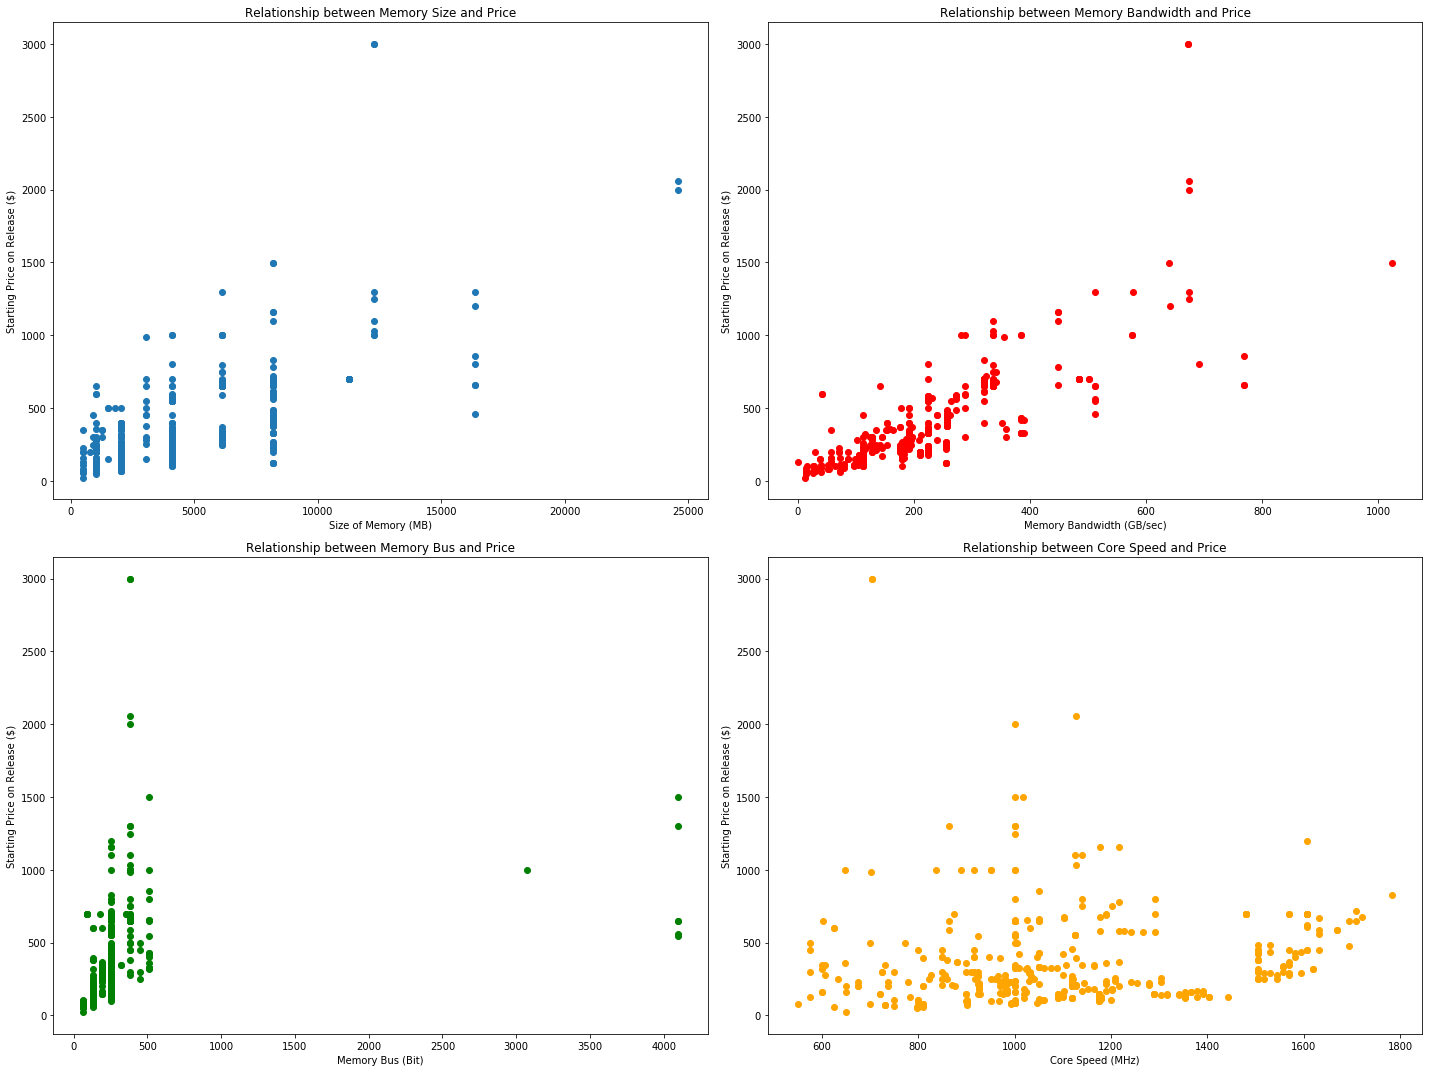

In general, higher performance in Memory Resources means higher prices.


In [57]:
print('How will this be applied if we combine all memories and price?')
# Plot new dataframe
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
plt.scatter(x=df['Memory'], y=df['Release_Price'])
plt.ylabel('Starting Price on Release ($)')
plt.xlabel('Size of Memory (MB)')
plt.title('Relationship between Memory Size and Price')

plt.subplot(2, 2, 2)
plt.scatter(x=df['Memory_Bandwidth'], y=df['Release_Price'], color='red')
plt.ylabel('Starting Price on Release ($)')
plt.xlabel('Memory Bandwidth (GB/sec)')
plt.title('Relationship between Memory Bandwidth and Price')

plt.subplot(2, 2, 3)
plt.scatter(x=df['Memory_Bus'], y=df['Release_Price'], color='green')
plt.ylabel('Starting Price on Release ($)')
plt.xlabel('Memory Bus (Bit)')
plt.title('Relationship between Memory Bus and Price')

plt.subplot(2, 2, 4)
plt.scatter(x=df['Core_Speed'], y=df['Release_Price'], color='orange')
plt.ylabel('Starting Price on Release ($)')
plt.xlabel('Core Speed (MHz)')
plt.title('Relationship between Core Speed and Price')

plt.tight_layout()
plt.show()

# Analysis
print('In general, higher performance in Memory Resources means higher prices.')

How will this look if we apply using boxplots to account for all the outliers?


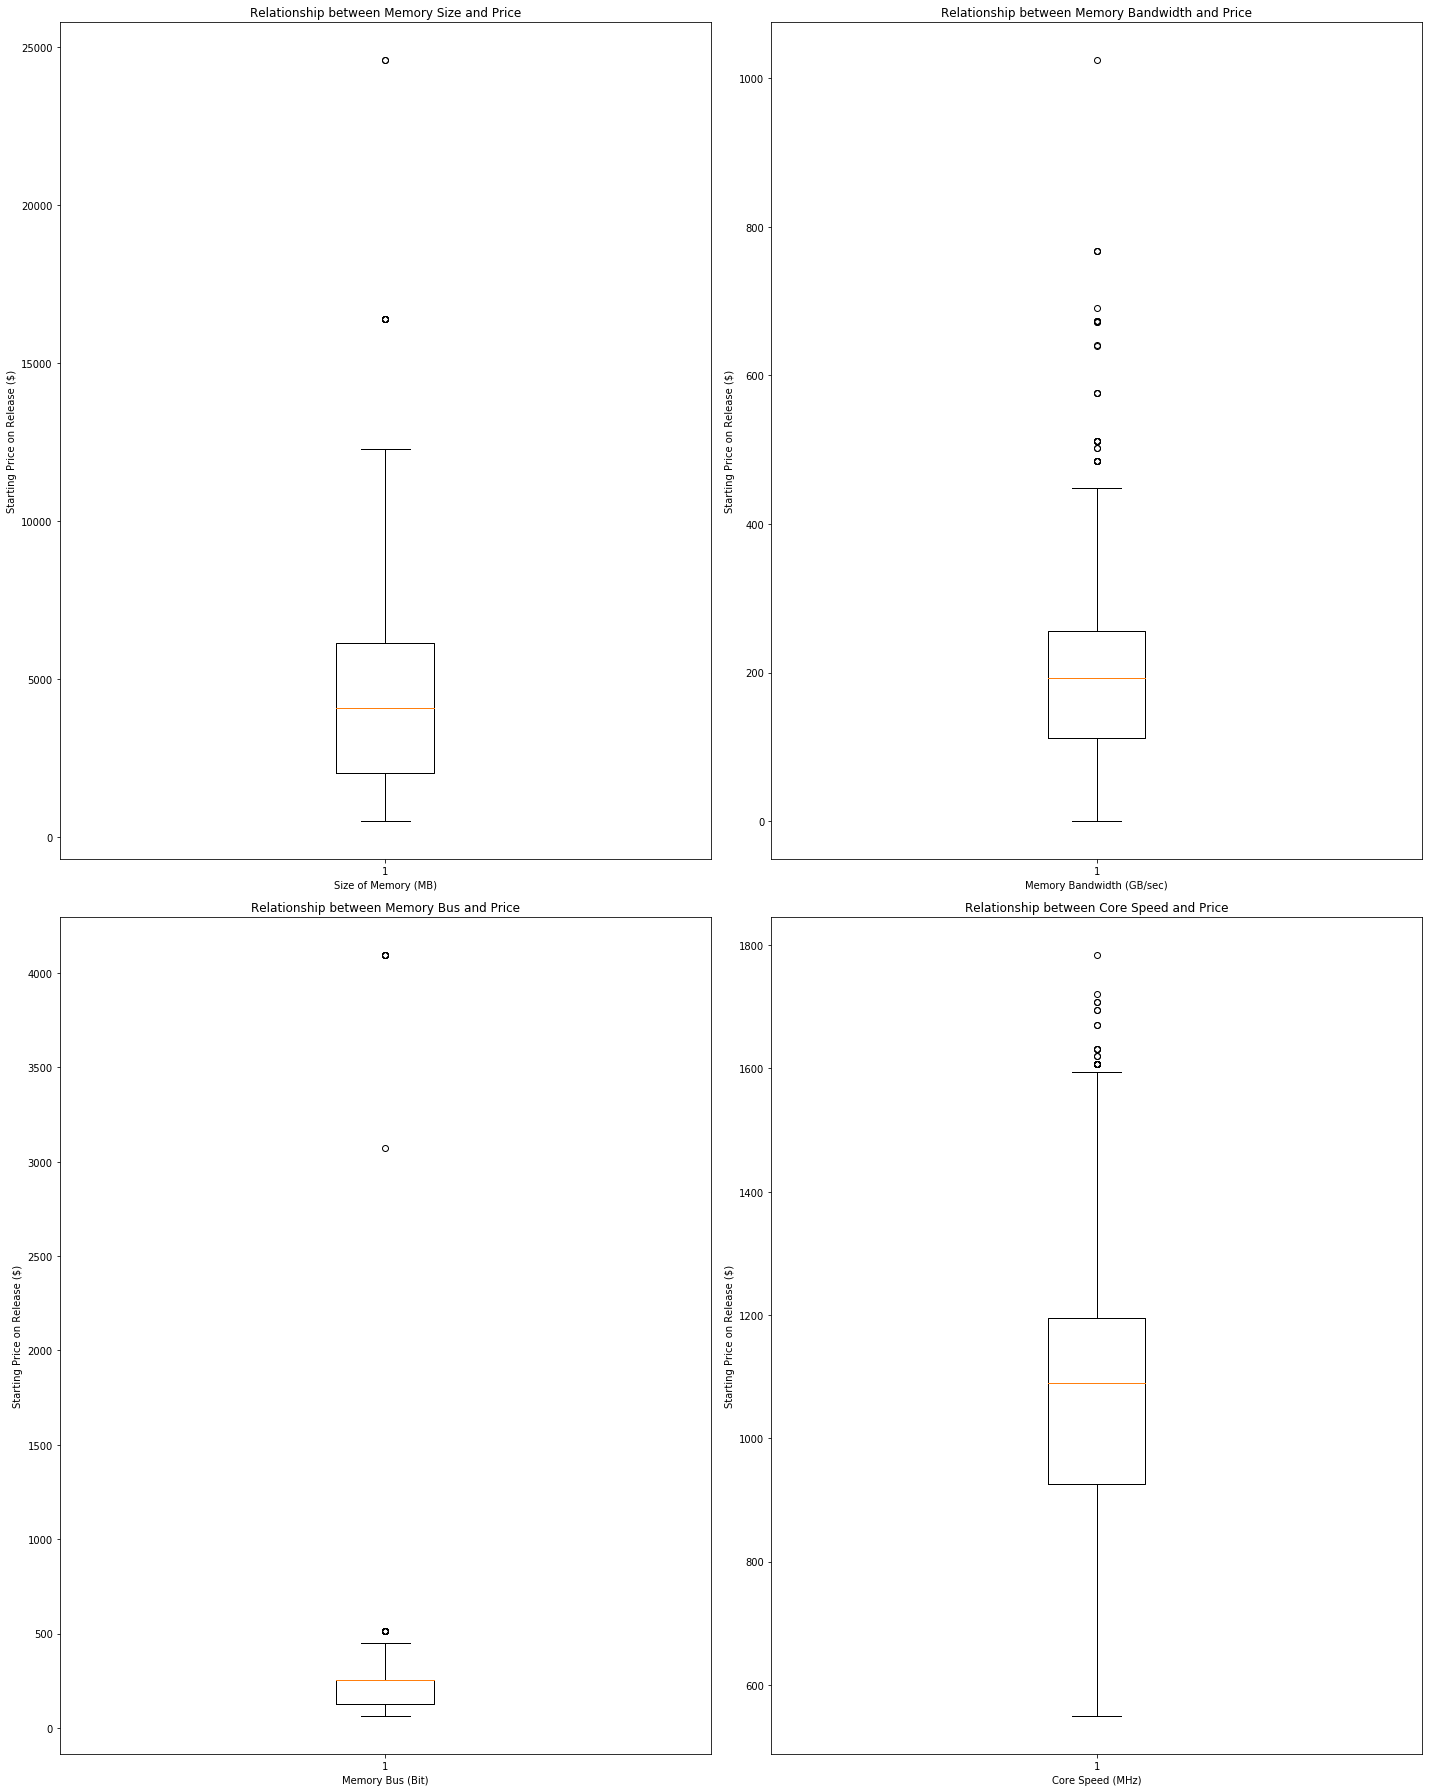

In [58]:
print('How will this look if we apply using boxplots to account for all the outliers?')
# Plot original dataframe
plt.figure(figsize=(20, 25))

plt.subplot(2, 2, 1)
plt.boxplot(df['Memory'])
plt.ylabel('Starting Price on Release ($)')
plt.xlabel('Size of Memory (MB)')
plt.title('Relationship between Memory Size and Price')

plt.subplot(2, 2, 2)
plt.boxplot(df['Memory_Bandwidth'])
plt.ylabel('Starting Price on Release ($)')
plt.xlabel('Memory Bandwidth (GB/sec)')
plt.title('Relationship between Memory Bandwidth and Price')

plt.subplot(2, 2, 3)
plt.boxplot(df['Memory_Bus'])
plt.ylabel('Starting Price on Release ($)')
plt.xlabel('Memory Bus (Bit)')
plt.title('Relationship between Memory Bus and Price')

plt.subplot(2, 2, 4)
plt.boxplot(df['Core_Speed'])
plt.ylabel('Starting Price on Release ($)')
plt.xlabel('Core Speed (MHz)')
plt.title('Relationship between Core Speed and Price')

plt.tight_layout()
plt.show()

Core Speed is clock speed, so here we count the most MHz at clock speed.
The graph is a bit skewed right.


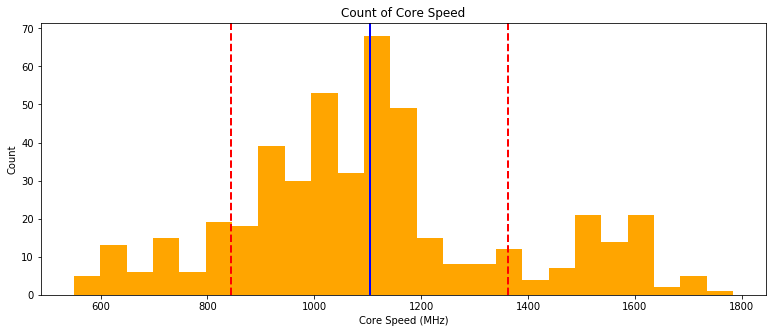

In [59]:
print('Core Speed is clock speed, so here we count the most MHz at clock speed.')
print('The graph is a bit skewed right.')
plt.figure(figsize=(13, 5))
plt.hist(df['Core_Speed'], bins=25, color='orange')
plt.axvline(df['Core_Speed'].mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(df['Core_Speed'].mean() + df['Core_Speed'].std(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(df['Core_Speed'].mean() - df['Core_Speed'].std(), color='r', linestyle='dashed', linewidth=2)
plt.ylabel('Count')
plt.xlabel('Core Speed (MHz)')
plt.title('Count of Core Speed')
plt.show()

In [60]:
# Modified dataframe to remove any zeros from dates.
df = df[df.Release_Date != "0"]

# Binning is not working.
#df["Release_Date"] = df["Release_Date"].astype("datetime64")
# Put the dates into bins.
#df.groupby(df["Release_Date"].dt.month).count().plot(kind="bar")

What dates have the GPUs been released?


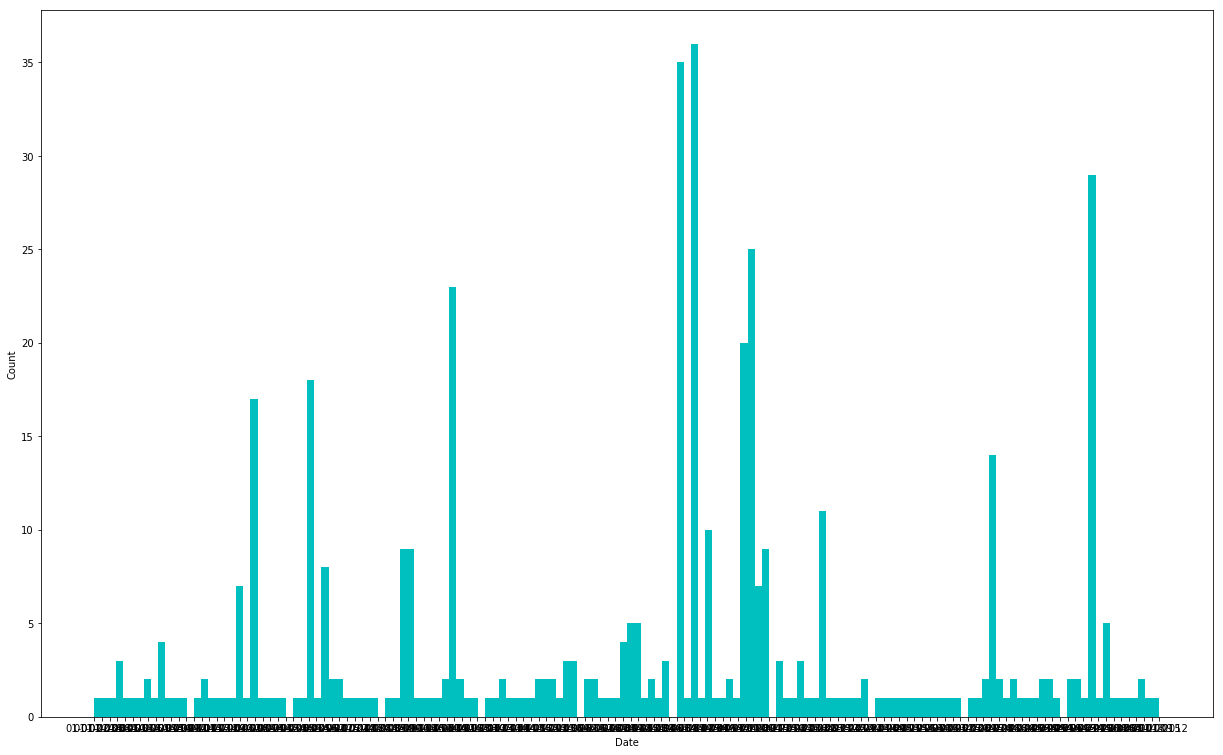

In [61]:
print('What dates have the GPUs been released?')
plt.figure(figsize=(21, 13))
plt.hist(df['Release_Date'], bins=150, color='c')
plt.legend(loc='upper right')
plt.ylabel('Count')
plt.xlabel('Date')
plt.show()

Over the course of time, did the price increase?


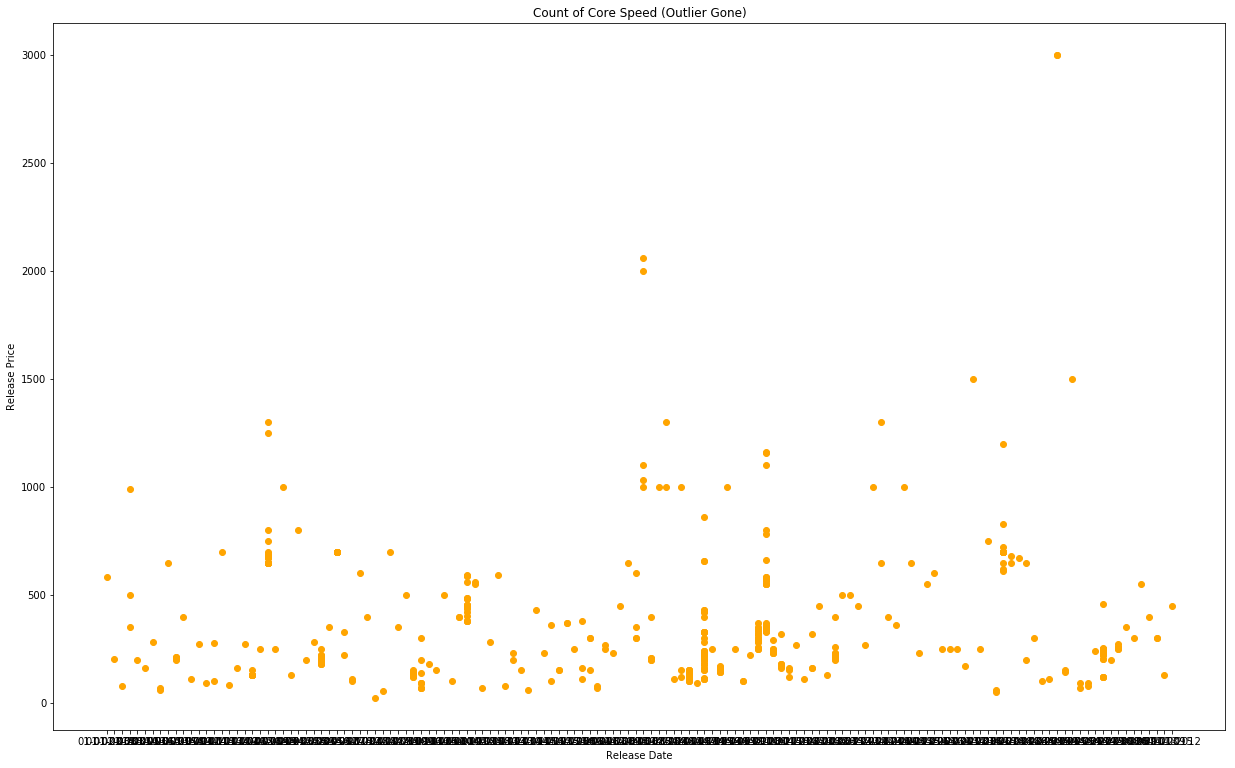

In general, we can see the released price increasing over time.


In [62]:
print('Over the course of time, did the price increase?')
# Plot release price against release date
plt.figure(figsize=(21, 13))
plt.scatter(x=df['Release_Date'], y=df['Release_Price'], color='orange')
plt.ylabel('Release Price')
plt.xlabel('Release Date')
plt.title('Count of Core Speed (Outlier Gone)')
plt.show()
print('In general, we can see the released price increasing over time.')

How has the usage of resources changed over time?


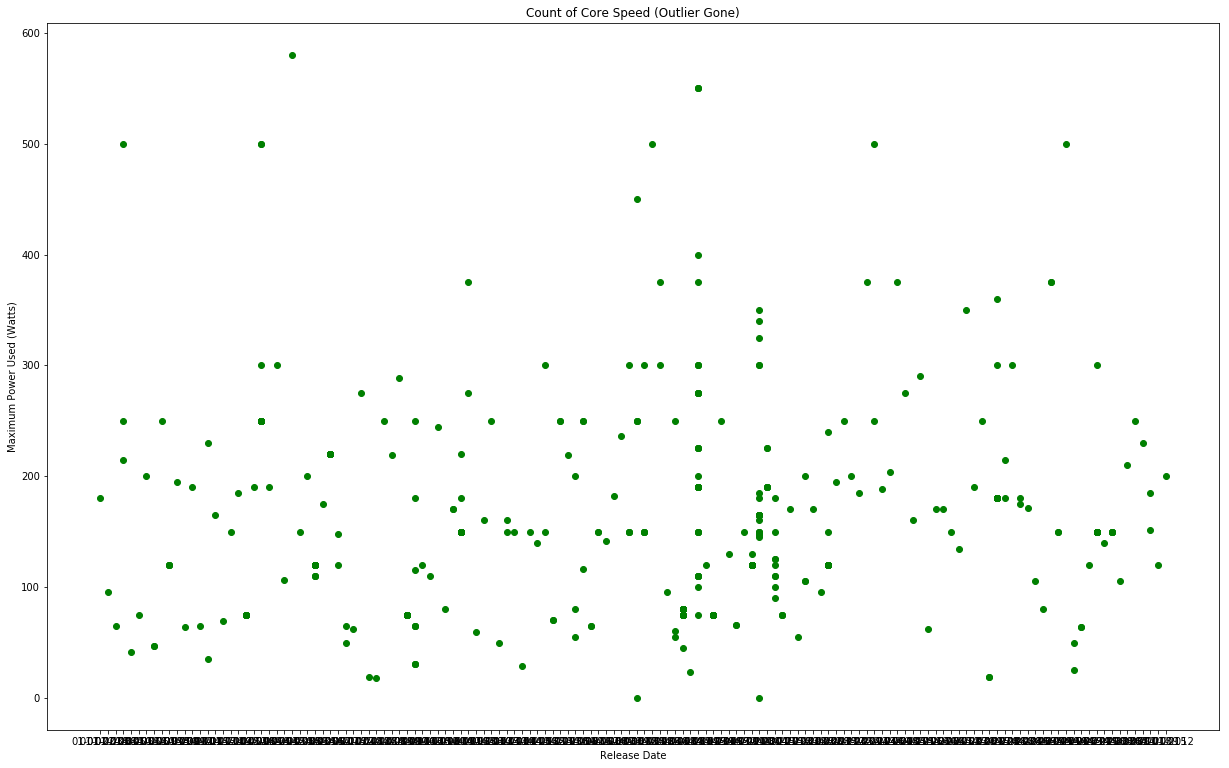

The power usage is scattered.


In [63]:
print('How has the usage of resources changed over time?')
# Modified dataframe to compare Maximum Power and Date
plt.figure(figsize=(21, 13))
plt.scatter(x=df['Release_Date'], y=df['Max_Power'], color='green')
plt.ylabel('Maximum Power Used (Watts)')
plt.xlabel('Release Date')
plt.title('Count of Core Speed (Outlier Gone)')
plt.show()
print('The power usage is scattered.')

How does core speed compare to memory speed?


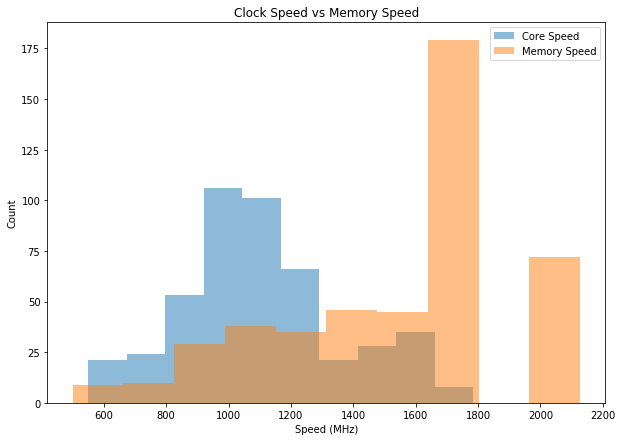

The difference between two sample mean is 436.46868250539956.
The arrary for size is [463 463].
The array for standard deviation is [ 260.63705318  369.02339951].
The standard error of this dataset is 20.99624274119535.
The T-value of this dataset is 20.78794229450553.


In [64]:
print('How does core speed compare to memory speed?')
# Compare the core speed to memory speed with both as MHz.
plt.figure(figsize=(10, 7))
plt.hist(df['Core_Speed'], alpha=0.5, label='Core Speed')
plt.hist(df['Memory_Speed'], alpha=0.5, label='Memory Speed')
plt.legend(loc='upper right')
plt.ylabel('Count')
plt.xlabel('Speed (MHz)')
plt.title('Clock Speed vs Memory Speed')
plt.show()
# Perform the T-Test
t_test(df['Core_Speed'], df['Memory_Speed'])

In the GPU market, on average, who produced the best processing power per energy spent?


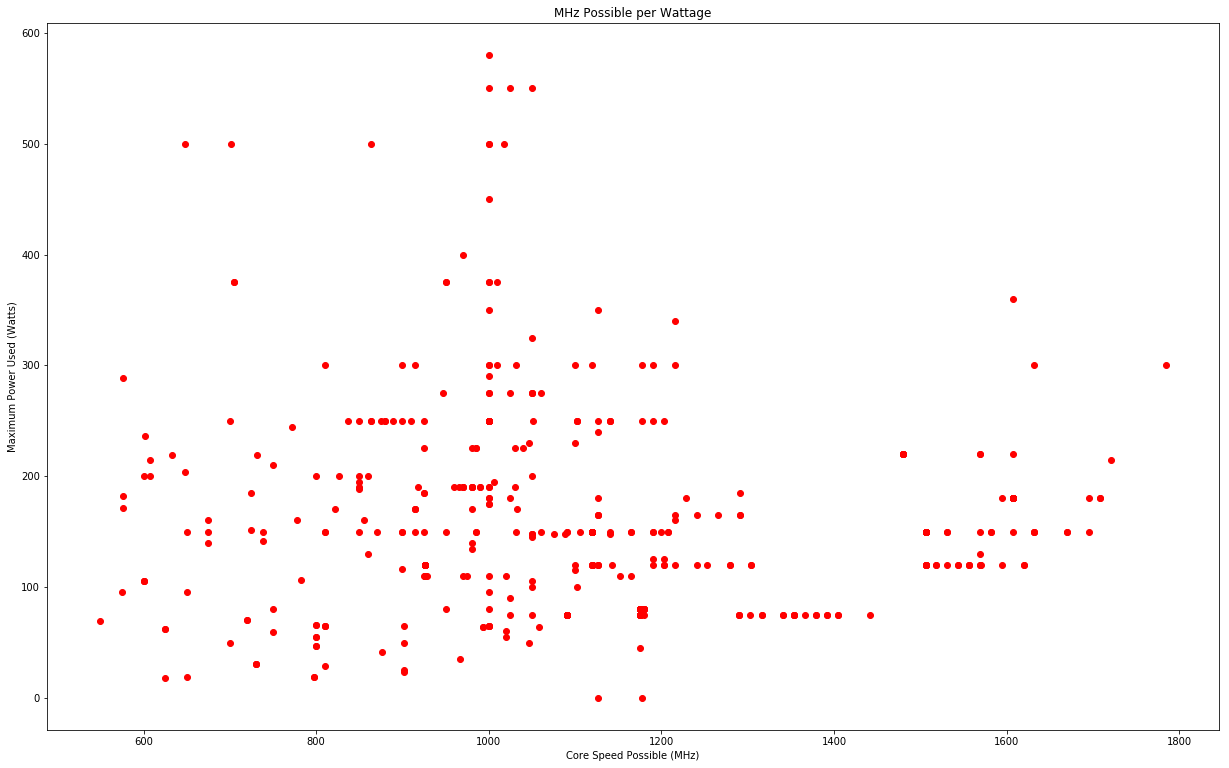

In general, we can see it is possible to lower wattage use as core speed is increased.
Therefore, it is not always the case that more speed cost more power.


In [65]:
print('In the GPU market, on average, who produced the best processing power per energy spent?')
# There are two types of power to read: PSU and Max Power.  PSU has too many holes, compare Max Power instead. 
plt.figure(figsize=(21, 13))
plt.scatter(x=df['Core_Speed'], y=df['Max_Power'], color='red')
plt.ylabel('Maximum Power Used (Watts)')
plt.xlabel('Core Speed Possible (MHz)')
plt.title('MHz Possible per Wattage')
plt.show()
print('In general, we can see it is possible to lower wattage use as core speed is increased.')
print('Therefore, it is not always the case that more speed cost more power.')

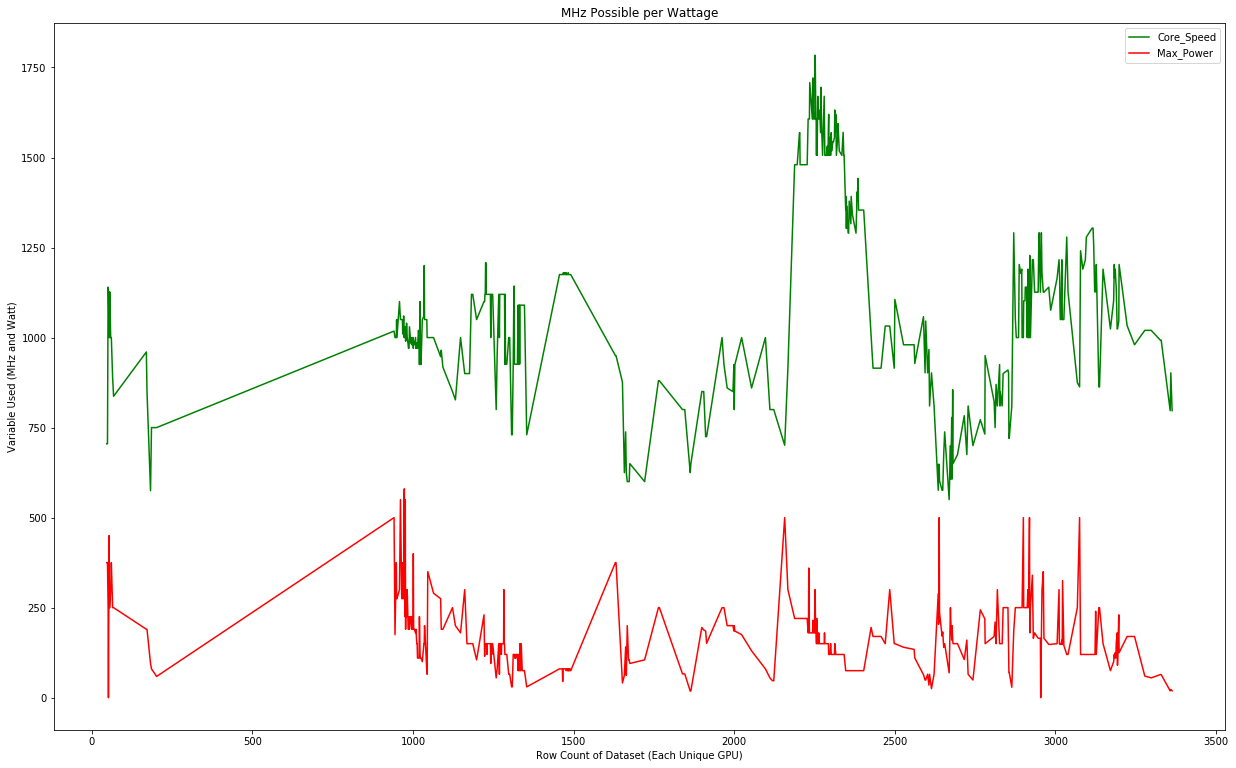

In general, we can see the released price increasing over time.


In [66]:
# Now compare Core Speed to Max Power.
plt.figure(figsize=(21, 13))
plt.plot(df['Core_Speed'], color='green')
plt.plot(df['Max_Power'], color='red')
plt.ylabel('Variable Used (MHz and Watt)')
plt.xlabel('Row Count of Dataset (Each Unique GPU)')
plt.title('MHz Possible per Wattage')
plt.legend(loc='upper right')
plt.show()
print('In general, we can see the released price increasing over time.')

In general, we can see the released price increasing over time.


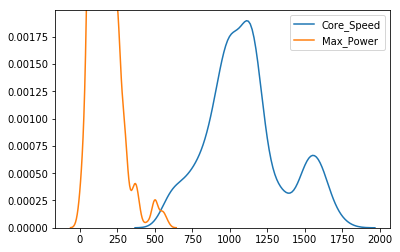

In [78]:
# Now compare Core Speed to Max Power.

# Initialize Figure and Axes object
ax = sns.kdeplot(df['Core_Speed'])
ax = sns.kdeplot(df['Max_Power'])
print('In general, we can see the released price increasing over time.')

In [50]:
# Unit 3 1.4 3.4 3.7
# A summary of all the columns.
df.describe()

,Core_Speed,DVI_Connection,DisplayPort_Connection,HDMI_Connection,Max_Power,Memory,Memory_Bandwidth,Memory_Bus,Memory_Speed,Open_GL,Release_Price,Shader,TMUs,VGA_Connection
count,471.000000,471.000000,315.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,433.000000,471.000000,471.000000
mean,1103.335456,1.229299,1.866667,1.016985,160.643312,4610.989384,212.712951,287.745223,1542.292994,4.428450,354.907367,4.952656,98.505308,0.065817
std,259.366171,0.689180,1.148802,0.356890,92.347725,3404.091140,139.869777,463.711212,367.874029,0.247879,328.763651,0.210156,53.692341,0.248226
min,550.000000,0.000000,0.000000,0.000000,0.000000,512.000000,0.000000,64.000000,500.000000,3.300000,23.000000,4.000000,8.000000,0.000000
25%,926.000000,1.000000,1.000000,1.000000,95.000000,2048.000000,112.000000,128.000000,1251.000000,4.500000,150.000000,5.000000,56.000000,0.000000
50%,1090.000000,1.000000,2.000000,1.000000,150.000000,4096.000000,192.200000,256.000000,1750.000000,4.500000,249.000000,5.000000,80.000000,0.000000
75%,1195.000000,2.000000,3.000000,1.000000,190.000000,6144.000000,256.300000,256.000000,1753.000000,4.500000,449.000000,5.000000,136.000000,0.000000
max,1784.000000,4.000000,4.000000,3.000000,580.000000,24576.000000,1024.000000,4096.000000,2127.000000,4.500000,2999.000000,5.000000,320.000000,1.000000
